<a href="https://colab.research.google.com/github/aarondelgiudice/thinkful_data_bootcamp/blob/master/unit_7/capstone/RD/7_1f_Computing_Similarity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Computing Similarity
- Audio Features
  - Cosine Similarity
  - Computing Similarity
- Embeddings Similarity
  - Cosine Similarity
  - Computing Similarity

## Load Data

In [0]:
# load packages
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")

from scipy import spatial

In [2]:
filename = "spotify_test_data"
df_af = pd.read_csv(filename + ".csv", index_col=0)

df_af.head()

,acousticness,analysis_url,danceability,duration_ms,energy,id,instrumentalness,key,liveness,loudness,mode,speechiness,target,tempo,time_signature,track_href,type,uri,valence,track_names,artist_names,album_names,release_dates,popularity,explicit
0,0.1730,https://api.spotify.com/v1/audio-analysis/7eEl...,0.796,197236,0.467,7eElVgPcxDqmgGrSwVFI74,0.004110,6,0.1260,-10.369,1,0.1810,1,107.901,4,https://api.spotify.com/v1/tracks/7eElVgPcxDqm...,audio_features,spotify:track:7eElVgPcxDqmgGrSwVFI74,0.516,Sober,Lorde,Melodrama,2017-06-16,59,True
1,0.2870,https://api.spotify.com/v1/audio-analysis/02oA...,0.771,189796,0.431,02oAUzv4M0ItuTDy2RT3IT,0.000003,10,0.0934,-5.423,1,0.0577,1,107.047,4,https://api.spotify.com/v1/tracks/02oAUzv4M0It...,audio_features,spotify:track:02oAUzv4M0ItuTDy2RT3IT,0.268,Homemade Dynamite,Lorde,Melodrama,2017-06-16,60,True
2,0.2390,https://api.spotify.com/v1/audio-analysis/5q4B...,0.664,271088,0.382,5q4BpnMrYEFzLO0dYODj6J,0.007490,0,0.0943,-9.977,1,0.0470,1,123.214,4,https://api.spotify.com/v1/tracks/5q4BpnMrYEFz...,audio_features,spotify:track:5q4BpnMrYEFzLO0dYODj6J,0.126,The Louvre,Lorde,Melodrama,2017-06-16,61,False
3,0.9200,https://api.spotify.com/v1/audio-analysis/6Kkt...,0.587,171728,0.229,6Kkt27YmFyIFrcX3QXFi2o,0.000000,10,0.1000,-11.254,0,0.1280,1,75.670,4,https://api.spotify.com/v1/tracks/6Kkt27YmFyIF...,audio_features,spotify:track:6Kkt27YmFyIFrcX3QXFi2o,0.379,Liability,Lorde,Melodrama,2017-06-16,69,False
4,0.0328,https://api.spotify.com/v1/audio-analysis/1Dp7...,0.487,367391,0.445,1Dp7JGFNjvg8Nk0CtMCcnr,0.010400,1,0.0778,-10.959,0,0.1130,1,97.031,4,https://api.spotify.com/v1/tracks/1Dp7JGFNjvg8...,audio_features,spotify:track:1Dp7JGFNjvg8Nk0CtMCcnr,0.180,Hard Feelings/Loveless,Lorde,Melodrama,2017-06-16,60,True


In [57]:
filename = "spotify_dist"
df_af_dist = pd.read_csv(filename + ".csv", index_col=0)

df_af_dist.head()

,7eElVgPcxDqmgGrSwVFI74,02oAUzv4M0ItuTDy2RT3IT,5q4BpnMrYEFzLO0dYODj6J,6Kkt27YmFyIFrcX3QXFi2o,1Dp7JGFNjvg8Nk0CtMCcnr,54ucfuN596MU25jQD3KjCL,193Dm5SqYy3hTSbuzxbwKc,6K8VQ84MqhsoakN5MjrnVR,6lFDB0BFDRV58qaQDX85jV,7ARveOiD31w2Nq0n5FsSf8,4fxNwAXn8J9LNi5Rz8eMIv,0cQ5y2ycYOR7KrMG752t8Q,1ZQwftFvuyrHrl41HA9dOC,48jKLs2qqEXKsQTmYHE0JD,2XELtFPg5H2Xmg6eas6dII,2ScrwCtee5LnTrpQZfrxqJ,0j1BAvgZnO5LoRCsGtgYYG,7GLvGlqdg2ocugG4G5ih4I,0cqiehfcVFq3ISC3pO9zLE,7w45f9uLSXE56Bezwjdl8B,53LWnHbfoBuARHoAtEwrBY,3cUQUcDvzrbfSFXHpLvdXf,3fOCHVP6W1uXr2kkZ1dzm0,720VccfW5GV9ZM4OKAAGUg,3t3oNm7M0HXf7ILqA7vCTP,20OrSCxQNhfAtiWtbLn3hf,6mmAeC57zRD5zzVTpB1ACF,3k08Cja0lw4MKJ72AyCGzU,4B6BiC4TZUbvXMbrdx2rhq,0bPSRn4crnh5f1JhELPlyL,7jStM0aMv8WoG91YrrDMbw,5SD3nF4GLH4UTtt0OGWatS,0gb1J5UrTpzaU1s3nupgCd,2MHCiOohBZEQuLgDTPvSzF,46lFttIf5hnUZMGvjK0Wxo,1uf5f99kLdlmUBEvVqrFyy,7kJlTKjNZVT26iwiDUVhRm,401Xo6kdmYwDZ5l0RDsjC4,0LkelFnnzJPC8dtZSZ9Og8,2mSrVZsSKn2Ye5f0YuAbMh,...,5EDt7cxNUAVK0QlGjPo1dZ,2XDFo773cf5SiQDPRKVrn4,6dGWq08LXuIw6T2oUeHECh,4cts2JWIBKsSyMuclg7yZP,4dim8F8t01qimHOmr6S3Gd,5NBbYPv6iAyrHFnSI1VSBa,6LRxf2d6Bztnn01smiwvxV.1,4CTRaPVgo1FBmDTcGlmwlp,18FrJXel361ubAHzCmK4Oh,6nYRlWG0Q3wnDTSGTsRGvJ,56AY1iF8R2nKzkyd9WqO5s,5j2yIrnbgDW51GM95ZjqDj,5gTSRrZ3U0n6prTlle2yD1,0cunAi5FhuVTMMIE9XfqfP.1,6UtB0ezZwMneQIfLJ1Yzc1,5Yi6mwvMHnnh241uGjcJYy,77cAX9YNjWeMVnIbxqmXCQ,1vuVRE6oXisoKFDqqs7CAD,1AxQ1GwibfZSL9iEDELkBY,13zXC9OQZByn4c75acjqcT,4oeQbo7JrGgUQEdstGXEWh,0PfPYe5VGsJTYkREkp8t5G,2A9ERxDfT3sdShrDUtTnaS,6Ra5YZBdQRVRHX1GhRA4hH,77mMRnFjJMuHAtXcJGjggl,4AueunxhnlBUvdLRfW03Nq,15KMF1tGXYUFs3Jvwnp45m,1ROpf85HZ15kXYHad4ZptK.2,3fqwjXwUGN6vbzIwvyFMhx.1,0qzjNRjr6znNsTGeLhKE9h,4OHh00l3XsQSibMHo169g0,4UBbI9mOVefKlFcMt9GQSq,76lgcpdPtw5hHu3A6LuGZe.1,5C6uh95eAL0RBTSGXKQwvk.1,6p5GuyEqQH5pv02ouEyogQ.1,3I7krC8kr0gFR7P6vInR1I.1,5Feu0AyHLrW0mCRAyUnZ6W.1,6caDnpIOivsjLRXqlJJxCD.1,10M2Ex445zw585Ducldzkw.1,66pxmg3Jhjm09tHoWR1wVR.1
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7eElVgPcxDqmgGrSwVFI74,0.000000,0.026598,0.163829,0.303586,0.165141,0.143090,0.192594,0.167708,0.111785,0.140388,0.322509,0.175266,0.149032,0.264042,0.271106,0.268192,0.260718,0.151407,0.135530,0.368235,0.132566,0.205602,0.221484,0.307071,0.212522,0.143552,0.168384,0.204308,0.145128,0.241550,0.146948,0.270993,0.248669,0.139982,0.163655,0.164109,0.135332,0.261476,0.276802,0.050721,...,0.127943,0.159662,0.157124,0.220498,0.184439,0.132907,0.231887,0.205121,0.175129,0.270022,0.230522,0.299606,0.169324,0.161556,0.155568,0.151060,0.170088,0.169688,0.208917,0.218147,0.143521,0.212637,0.127360,0.271322,0.180460,0.178144,0.215916,0.183405,0.161527,0.347996,0.185901,0.166498,0.196897,0.267421,0.195383,0.135328,0.186593,0.178485,0.135092,0.137819
02oAUzv4M0ItuTDy2RT3IT,0.026598,0.000000,0.183026,0.254161,0.193292,0.104498,0.155255,0.189037,0.128637,0.177678,0.367689,0.202814,0.162018,0.308513,0.251906,0.246857,0.285589,0.127185,0.134882,0.354140,0.147857,0.191985,0.226782,0.345068,0.221746,0.100828,0.134750,0.231735,0.168401,0.273187,0.125330,0.254622,0.265467,0.166059,0.192005,0.168614,0.172338,0.261992,0.308008,0.082329,...,0.125682,0.204876,0.184989,0.243569,0.222197,0.135550,0.234397,0.229185,0.168977,0.220669,0.252952,0.318276,0.167652,0.158718,0.158783,0.134959,0.191562,0.160340,0.247505,0.243465,0.128340,0.227250,0.138218,0.266835,0.188590,0.199628,0.158511,0.196426,0.140784,0.353438,0.130381,0.137287,0.190624,0.274885,0.216503,0.119482,0.230132,0.175664,0.106186,0.155896
5q4BpnMrYEFzLO0dYODj6J,0.163829,0.183026,0.000000,0.334314,0.305601,0.362048,0.129573,0.003650,0.193665,0.297030,0.248830,0.047273,0.062803,0.218348,0.350209,0.256547,0.274293,0.092045,0.153690,0.228228,0.082566,0.093512,0.057407,0.246732,0.087562,0.133875,0.140147,0.083944,0.044811,0.257139,0.089803,0.343258,0.262232,0.085883,0.045965,0.165750,0.298386,0.216082,0.245967,0.200773,...,0.087474,0.120378,0.129200,0.142943,0.089855,0.112308,0.081060,0.078675,0.173341,0.284223,0.124901,0.199834,0.210680,0.082401,0.055256,0.102495,0.073798,0.123036,0.17

In [45]:
filename = "lyric_embeddings_1024"
df_emb = pd.read_csv(filename + ".csv", index_col=0)

df_emb.head()

,id,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,7eElVgPcxDqmgGrSwVFI74,-1.176089,-0.107737,-0.569370,-0.250905,-0.196079,0.233768,0.643306,1.164762,-0.953797,0.885341,0.233456,1.157343,-1.184159,2.234673,1.082309,1.509842,1.017656,0.275086,0.189763,0.016859,-0.937232,0.386363,-0.124789,-0.556945,-0.054143,-0.929406,-0.012605,0.002390,0.076078,1.339858,-0.044450,0.330110,0.442595,0.388205,-0.376086,0.700518,0.621598,0.748061,-0.216787,...,-0.798792,0.545758,-1.742035,1.100794,-0.220692,0.231865,-1.909952,0.287531,1.090605,-0.316892,-0.428898,-1.394379,0.174889,0.161786,0.455423,-0.789939,0.718991,0.441111,-3.599369,0.491262,2.301007,-0.248004,-0.391195,-1.016250,3.749099,-1.811283,-0.371740,0.443924,1.509911,0.873805,1.110983,0.665313,-0.374531,1.115654,1.214633,-1.089690,0.626421,0.225999,1.874248,0.061833
1,02oAUzv4M0ItuTDy2RT3IT,-0.818456,-0.335162,-0.709084,-0.453882,-0.044109,-0.442736,0.629614,1.860680,-0.421865,1.260538,0.633872,1.731610,-0.870405,1.403824,2.325687,1.376182,0.929350,1.006097,0.436990,-0.342039,-0.436087,0.256072,0.461765,-1.524332,-0.195616,-0.076263,-0.307228,-0.743518,-0.357217,0.622497,0.169596,0.113535,1.616498,0.245950,0.090101,1.020024,0.232876,0.335385,-0.841537,...,0.285158,-0.263945,0.749996,0.654952,-0.238688,-0.054873,-1.097025,0.391275,0.748996,-0.616449,-0.261274,-0.062964,-0.156516,0.493264,-0.154108,-1.271534,-0.117976,0.833755,-2.488465,0.329558,1.326031,0.313144,0.049839,-1.980360,2.495708,-1.027027,-0.406434,0.175048,1.367751,-0.353575,-0.577227,0.156613,-0.466348,0.963598,0.362988,-1.543788,1.052845,-0.416015,1.296092,0.121682
2,5q4BpnMrYEFzLO0dYODj6J,-0.878218,0.282790,-0.808863,-0.433924,0.407604,-0.123266,1.535059,2.379490,-0.050003,1.327469,0.951804,1.565531,-2.178823,2.941031,2.310419,0.691588,0.846726,0.990229,-0.498455,-0.957336,-0.606049,0.509263,-0.357404,-0.061091,-0.657854,0.445772,0.291457,-0.649670,-0.397943,0.907033,0.644040,1.077925,0.929998,-0.379858,-0.019066,1.889962,-0.469290,0.961969,-0.685247,...,0.242475,0.261855,-1.700499,1.223980,0.194463,0.149520,-1.180804,0.501860,1.182535,-0.521616,0.022584,-0.413291,-0.211203,-0.180345,0.320369,0.002017,0.229807,1.572091,-3.182798,0.267235,1.822537,-0.073181,-0.531030,-1.385447,3.121033,-1.586558,-1.017582,0.794861,2.035471,1.305898,-0.218693,0.765706,0.129413,0.004000,1.214114,-0.778976,0.771592,0.742636,1.440566,0.341989
3,6Kkt27YmFyIFrcX3QXFi2o,-0.466507,0.792432,-0.494447,-0.100590,0.546727,-0.253614,0.794765,2.198832,-0.234965,0.627541,0.867905,1.829224,-1.905063,2.337999,1.501105,0.749387,1.298659,0.994754,-0.205810,-0.534288,-0.753254,0.670505,0.460462,-0.790256,-0.331815,0.215781,-0.252302,-1.027334,-0.459904,1.226175,0.722869,0.377776,0.561733,-0.383966,1.132673,1.598741,-0.868457,0.226428,-0.208647,...,-0.333039,-0.237912,-0.983652,1.242136,0.472568,-0.082934,-1.539467,-0.382526,1.190959,-0.089749,-0.371374,-0.707636,-0.157277,-0.374877,0.577229,-0.268020,-0.225148,0.318669,-2.760939,0.618850,1.227416,0.366311,-0.322368,-1.513218,2.884911,-1.859549,-0.601079,0.124937,1.923958,0.742204,0.565165,0.367270,0.400754,0.731161,0.027032,-1.258719,0.053601,0.620349,1.534137,0.729435
4,1Dp7JGFNjvg8Nk0CtMCcnr,-0.821989,1.116456,-0.099389,0.346411,0.864321,-0.394252,0.421176,1.416335,-0.827872,1.231101,0.509105,1.946500,-1.710877,1.770404,1.396535,1.170612,0.788084,1.045131,-0.393810,-0.345053,-0.226228,1.440690,0.052912,-0.692761,-0.927573,-0.514701,-0.332411,-1.399359,-0.215262,1.182957,0.182795,0.323677,0.178181,0.203908,0.652043,1.405541,-0.505214,-0.201571,-0.538093,...,0.261286,0.062619,-0.791093,1.272661,0.106606,0.545044,-0.981968,-0.429405,0.693736,0.359888,-0.533965,-1.278841,0.436552,-0.361887,0.937292,-0.128248,0.578932,1.355664,-1.887670,-0.182790,1.033373,0.134563,

In [58]:
filename = "embeddings_dist"
df_emb_dist = pd.read_csv(filename + ".csv", index_col=0)

df_emb_dist.head()

,7eElVgPcxDqmgGrSwVFI74,02oAUzv4M0ItuTDy2RT3IT,5q4BpnMrYEFzLO0dYODj6J,6Kkt27YmFyIFrcX3QXFi2o,1Dp7JGFNjvg8Nk0CtMCcnr,54ucfuN596MU25jQD3KjCL,193Dm5SqYy3hTSbuzxbwKc,6K8VQ84MqhsoakN5MjrnVR,6lFDB0BFDRV58qaQDX85jV,7ARveOiD31w2Nq0n5FsSf8,4fxNwAXn8J9LNi5Rz8eMIv,0cQ5y2ycYOR7KrMG752t8Q,1ZQwftFvuyrHrl41HA9dOC,48jKLs2qqEXKsQTmYHE0JD,2XELtFPg5H2Xmg6eas6dII,2ScrwCtee5LnTrpQZfrxqJ,0j1BAvgZnO5LoRCsGtgYYG,7GLvGlqdg2ocugG4G5ih4I,0cqiehfcVFq3ISC3pO9zLE,7w45f9uLSXE56Bezwjdl8B,53LWnHbfoBuARHoAtEwrBY,3cUQUcDvzrbfSFXHpLvdXf,3fOCHVP6W1uXr2kkZ1dzm0,720VccfW5GV9ZM4OKAAGUg,3t3oNm7M0HXf7ILqA7vCTP,20OrSCxQNhfAtiWtbLn3hf,6mmAeC57zRD5zzVTpB1ACF,3k08Cja0lw4MKJ72AyCGzU,4B6BiC4TZUbvXMbrdx2rhq,0bPSRn4crnh5f1JhELPlyL,7jStM0aMv8WoG91YrrDMbw,5SD3nF4GLH4UTtt0OGWatS,0gb1J5UrTpzaU1s3nupgCd,2MHCiOohBZEQuLgDTPvSzF,46lFttIf5hnUZMGvjK0Wxo,1uf5f99kLdlmUBEvVqrFyy,7kJlTKjNZVT26iwiDUVhRm,401Xo6kdmYwDZ5l0RDsjC4,0LkelFnnzJPC8dtZSZ9Og8,2mSrVZsSKn2Ye5f0YuAbMh,...,5EDt7cxNUAVK0QlGjPo1dZ,2XDFo773cf5SiQDPRKVrn4,6dGWq08LXuIw6T2oUeHECh,4cts2JWIBKsSyMuclg7yZP,4dim8F8t01qimHOmr6S3Gd,5NBbYPv6iAyrHFnSI1VSBa,6LRxf2d6Bztnn01smiwvxV.1,4CTRaPVgo1FBmDTcGlmwlp,18FrJXel361ubAHzCmK4Oh,6nYRlWG0Q3wnDTSGTsRGvJ,56AY1iF8R2nKzkyd9WqO5s,5j2yIrnbgDW51GM95ZjqDj,5gTSRrZ3U0n6prTlle2yD1,0cunAi5FhuVTMMIE9XfqfP.1,6UtB0ezZwMneQIfLJ1Yzc1,5Yi6mwvMHnnh241uGjcJYy,77cAX9YNjWeMVnIbxqmXCQ,1vuVRE6oXisoKFDqqs7CAD,1AxQ1GwibfZSL9iEDELkBY,13zXC9OQZByn4c75acjqcT,4oeQbo7JrGgUQEdstGXEWh,0PfPYe5VGsJTYkREkp8t5G,2A9ERxDfT3sdShrDUtTnaS,6Ra5YZBdQRVRHX1GhRA4hH,77mMRnFjJMuHAtXcJGjggl,4AueunxhnlBUvdLRfW03Nq,15KMF1tGXYUFs3Jvwnp45m,1ROpf85HZ15kXYHad4ZptK.2,3fqwjXwUGN6vbzIwvyFMhx.1,0qzjNRjr6znNsTGeLhKE9h,4OHh00l3XsQSibMHo169g0,4UBbI9mOVefKlFcMt9GQSq,76lgcpdPtw5hHu3A6LuGZe.1,5C6uh95eAL0RBTSGXKQwvk.1,6p5GuyEqQH5pv02ouEyogQ.1,3I7krC8kr0gFR7P6vInR1I.1,5Feu0AyHLrW0mCRAyUnZ6W.1,6caDnpIOivsjLRXqlJJxCD.1,10M2Ex445zw585Ducldzkw.1,66pxmg3Jhjm09tHoWR1wVR.1
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7eElVgPcxDqmgGrSwVFI74,2.220446e-16,0.209046,1.631004e-01,0.172848,0.227003,0.190718,0.197278,0.200244,0.262381,0.479395,0.239009,0.207264,0.272530,0.445243,0.259907,0.254001,0.484372,0.205664,0.188793,0.195302,0.216984,0.209604,0.227723,0.258366,0.489269,0.291744,0.437158,0.464514,0.246907,0.205205,0.270144,0.462813,0.250500,0.225165,0.225222,0.216851,0.194231,0.182007,0.201356,0.200978,...,0.779768,0.781027,0.782297,0.783474,0.784337,0.784974,0.785314,0.785362,0.785154,0.784615,0.783645,0.782633,0.782028,0.781920,0.782083,0.782454,0.782828,0.782893,0.782686,0.782051,0.781140,0.780115,0.779044,0.777976,0.776802,0.775440,0.773886,0.772061,0.769934,0.767260,0.764179,0.761495,0.759346,0.758467,0.759880,0.760446,0.765176,0.772505,0.798240,0.810309
02oAUzv4M0ItuTDy2RT3IT,2.090460e-01,0.000000,2.147844e-01,0.218002,0.234047,0.241604,0.311516,0.308044,0.299157,0.537719,0.338557,0.288565,0.284981,0.492669,0.299413,0.305066,0.540600,0.257081,0.243899,0.237109,0.271041,0.251731,0.239889,0.312187,0.535875,0.301570,0.473370,0.506402,0.256393,0.313694,0.323948,0.509926,0.306259,0.276673,0.257832,0.264852,0.285089,0.264626,0.223111,0.265495,...,0.791969,0.793223,0.794563,0.795914,0.797038,0.798009,0.798873,0.799882,0.801075,0.802118,0.802826,0.803459,0.804159,0.805079,0.806184,0.807394,0.808625,0.809638,0.810360,0.810713,0.810774,0.810524,0.810034,0.809596,0.809041,0.808246,0.807140,0.805588,0.803576,0.800878,0.797686,0.794764,0.792502,0.791754,0.793270,0.795838,0.800230,0.804323,0.818288,0.849838
5q4BpnMrYEFzLO0dYODj6J,1.631004e-01,0.214784,2.220446e-16,0.103300,0.177369,0.110317,0.130046,0.134982,0.236944,0.479910,0.203131,0.169765,0.211419,0.436459,0.221020,0.195546,0.467998,0.183151,0.154735,0.150214,0.177579,0.177069,0.178816,0.188236,0.472871,0.205003,0.409875,0.446293,0.188540,0.170808,0.219617,0.446335,0.215231,0.190127,0.187762,0.158987,0.147979,0.138200,0.173882,0.176870,...,0.779193,0.780331,0.781539,0.782634,0.783404,0.784073,0.784684,0.785356,0.786018,0.786463,0.786395,0.785990,0.785656,0.785576,0.785540,0.78528

## Audio Feature Similarity

### Cosine Similarity

In [4]:
cols = ['acousticness', 'danceability', 'duration_ms', 'energy',
        'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
        'speechiness', 'tempo', 'time_signature', 'valence',
        'popularity']
Audio_Features = df_af[cols]
Audio_Features.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity
0,0.1730,0.796,197236,0.467,0.004110,6,0.1260,-10.369,1,0.1810,107.901,4,0.516,59
1,0.2870,0.771,189796,0.431,0.000003,10,0.0934,-5.423,1,0.0577,107.047,4,0.268,60
2,0.2390,0.664,271088,0.382,0.007490,0,0.0943,-9.977,1,0.0470,123.214,4,0.126,61
3,0.9200,0.587,171728,0.229,0.000000,10,0.1000,-11.254,0,0.1280,75.670,4,0.379,69
4,0.0328,0.487,367391,0.445,0.010400,1,0.0778,-10.959,0,0.1130,97.031,4,0.180,60


In [5]:
Audio_Features.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity
count,3502.000000,3502.000000,3502.000000,3502.000000,3502.000000,3502.000000,3502.000000,3502.000000,3502.000000,3502.000000,3502.000000,3502.000000,3502.000000,3502.000000
mean,0.273028,0.570359,226008.314106,0.624774,0.055689,5.308110,0.173327,-7.297160,0.717590,0.058897,122.851039,3.957167,0.442627,30.660194
std,0.272505,0.117471,47687.658649,0.194005,0.181753,3.578098,0.136656,3.173063,0.450236,0.059604,29.567463,0.256075,0.231606,21.996583
min,0.000011,0.061500,57196.000000,0.006150,0.000000,0.000000,0.014300,-30.875000,0.000000,0.022500,48.718000,1.000000,0.030100,0.000000
25%,0.039875,0.499000,196667.250000,0.487000,0.000000,2.000000,0.096225,-8.899000,0.000000,0.031300,99.979250,4.000000,0.261000,9.000000
50%,0.171000,0.575000,218846.500000,0.649000,0.000008,5.000000,0.119000,-6.678500,1.000000,0.038700,122.001000,4.000000,0.424000,32.000000
75%,0.455000,0.647000,245559.000000,0.785000,0.001090,9.000000,0.200750,-5.105000,1.000000,0.057075,142.648000,4.000000,0.611000,48.000000
max,0.994000,0.946000,547733.000000,0.994000,0.970000,11.000000,0.978000,-0.755000,1.000000,0.521000,209.515000,5.000000,0.982000,85.000000


In [6]:
# scale data
Audio_Features_raw = Audio_Features.copy()

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
Audio_Features = scaler.fit_transform(Audio_Features)
Audio_Features = pd.DataFrame(Audio_Features, columns=cols, index=df_af['id'])
Audio_Features['explicit'] = list(df_af['explicit'])
Audio_Features.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity
count,3502.000000,3502.000000,3502.000000,3502.000000,3502.000000,3502.000000,3502.000000,3502.000000,3502.000000,3502.000000,3502.000000,3502.000000,3502.000000,3502.000000
mean,0.274668,0.575307,0.344138,0.626233,0.057411,0.482555,0.165017,0.782797,0.717590,0.073013,0.461035,0.739292,0.433373,0.360708
std,0.274153,0.132811,0.097215,0.196391,0.187375,0.325282,0.141803,0.105347,0.450236,0.119567,0.183881,0.064019,0.243310,0.258783
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.040105,0.494630,0.284324,0.486764,0.000000,0.181818,0.085011,0.729615,0.000000,0.017653,0.318795,0.750000,0.242567,0.105882
50%,0.172023,0.580554,0.329538,0.650757,0.000008,0.454545,0.108644,0.803337,1.000000,0.032497,0.455749,0.750000,0.413804,0.376471
75%,0.457740,0.661956,0.383993,0.788429,0.001124,0.818182,0.193473,0.855578,1.000000,0.069358,0.584153,0.750000,0.610253,0.564706
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
#from scipy import spatial
print(spatial.distance.cosine(Audio_Features.iloc[0, :], Audio_Features.iloc[1, :]))
print(spatial.distance.cosine(Audio_Features.iloc[0, :], Audio_Features.iloc[2, :]))

0.026598176898416814
0.16382888152940012


In [8]:
# Compute the similarity matrix between the embeddings vectors.
dist = spatial.distance.cdist(Audio_Features, Audio_Features, metric='cosine') 
df_af_dist = pd.DataFrame(data=dist, columns=df_af['id'], index=df_af['id'])

print(df_af_dist.shape)
display(df_af_dist.head())

(3502, 3502)


id,7eElVgPcxDqmgGrSwVFI74,02oAUzv4M0ItuTDy2RT3IT,5q4BpnMrYEFzLO0dYODj6J,6Kkt27YmFyIFrcX3QXFi2o,1Dp7JGFNjvg8Nk0CtMCcnr,54ucfuN596MU25jQD3KjCL,193Dm5SqYy3hTSbuzxbwKc,6K8VQ84MqhsoakN5MjrnVR,6lFDB0BFDRV58qaQDX85jV,7ARveOiD31w2Nq0n5FsSf8,4fxNwAXn8J9LNi5Rz8eMIv,0cQ5y2ycYOR7KrMG752t8Q,1ZQwftFvuyrHrl41HA9dOC,48jKLs2qqEXKsQTmYHE0JD,2XELtFPg5H2Xmg6eas6dII,2ScrwCtee5LnTrpQZfrxqJ,0j1BAvgZnO5LoRCsGtgYYG,7GLvGlqdg2ocugG4G5ih4I,0cqiehfcVFq3ISC3pO9zLE,7w45f9uLSXE56Bezwjdl8B,53LWnHbfoBuARHoAtEwrBY,3cUQUcDvzrbfSFXHpLvdXf,3fOCHVP6W1uXr2kkZ1dzm0,720VccfW5GV9ZM4OKAAGUg,3t3oNm7M0HXf7ILqA7vCTP,20OrSCxQNhfAtiWtbLn3hf,6mmAeC57zRD5zzVTpB1ACF,3k08Cja0lw4MKJ72AyCGzU,4B6BiC4TZUbvXMbrdx2rhq,0bPSRn4crnh5f1JhELPlyL,7jStM0aMv8WoG91YrrDMbw,5SD3nF4GLH4UTtt0OGWatS,0gb1J5UrTpzaU1s3nupgCd,2MHCiOohBZEQuLgDTPvSzF,46lFttIf5hnUZMGvjK0Wxo,1uf5f99kLdlmUBEvVqrFyy,7kJlTKjNZVT26iwiDUVhRm,401Xo6kdmYwDZ5l0RDsjC4,0LkelFnnzJPC8dtZSZ9Og8,2mSrVZsSKn2Ye5f0YuAbMh,...,5EDt7cxNUAVK0QlGjPo1dZ,2XDFo773cf5SiQDPRKVrn4,6dGWq08LXuIw6T2oUeHECh,4cts2JWIBKsSyMuclg7yZP,4dim8F8t01qimHOmr6S3Gd,5NBbYPv6iAyrHFnSI1VSBa,6LRxf2d6Bztnn01smiwvxV,4CTRaPVgo1FBmDTcGlmwlp,18FrJXel361ubAHzCmK4Oh,6nYRlWG0Q3wnDTSGTsRGvJ,56AY1iF8R2nKzkyd9WqO5s,5j2yIrnbgDW51GM95ZjqDj,5gTSRrZ3U0n6prTlle2yD1,0cunAi5FhuVTMMIE9XfqfP,6UtB0ezZwMneQIfLJ1Yzc1,5Yi6mwvMHnnh241uGjcJYy,77cAX9YNjWeMVnIbxqmXCQ,1vuVRE6oXisoKFDqqs7CAD,1AxQ1GwibfZSL9iEDELkBY,13zXC9OQZByn4c75acjqcT,4oeQbo7JrGgUQEdstGXEWh,0PfPYe5VGsJTYkREkp8t5G,2A9ERxDfT3sdShrDUtTnaS,6Ra5YZBdQRVRHX1GhRA4hH,77mMRnFjJMuHAtXcJGjggl,4AueunxhnlBUvdLRfW03Nq,15KMF1tGXYUFs3Jvwnp45m,1ROpf85HZ15kXYHad4ZptK,3fqwjXwUGN6vbzIwvyFMhx,0qzjNRjr6znNsTGeLhKE9h,4OHh00l3XsQSibMHo169g0,4UBbI9mOVefKlFcMt9GQSq,76lgcpdPtw5hHu3A6LuGZe,5C6uh95eAL0RBTSGXKQwvk,6p5GuyEqQH5pv02ouEyogQ,3I7krC8kr0gFR7P6vInR1I,5Feu0AyHLrW0mCRAyUnZ6W,6caDnpIOivsjLRXqlJJxCD,10M2Ex445zw585Ducldzkw,66pxmg3Jhjm09tHoWR1wVR
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7eElVgPcxDqmgGrSwVFI74,0.000000,0.026598,0.163829,0.303586,0.165141,0.143090,0.192594,0.167708,0.111785,0.140388,0.322509,0.175266,0.149032,0.264042,0.271106,0.268192,0.260718,0.151407,0.135530,0.368235,0.132566,0.205602,0.221484,0.307071,0.212522,0.143552,0.168384,0.204308,0.145128,0.241550,0.146948,0.270993,0.248669,0.139982,0.163655,0.164109,0.135332,0.261476,0.276802,0.050721,...,0.127943,0.159662,0.157124,0.220498,0.184439,0.132907,0.231887,0.205121,0.175129,0.270022,0.230522,0.299606,0.169324,0.161556,0.155568,0.151060,0.170088,0.169688,0.208917,0.218147,0.143521,0.212637,0.127360,0.271322,0.180460,0.178144,0.215916,0.183405,0.161527,0.347996,0.185901,0.166498,0.196897,0.267421,0.195383,0.135328,0.186593,0.178485,0.135092,0.137819
02oAUzv4M0ItuTDy2RT3IT,0.026598,0.000000,0.183026,0.254161,0.193292,0.104498,0.155255,0.189037,0.128637,0.177678,0.367689,0.202814,0.162018,0.308513,0.251906,0.246857,0.285589,0.127185,0.134882,0.354140,0.147857,0.191985,0.226782,0.345068,0.221746,0.100828,0.134750,0.231735,0.168401,0.273187,0.125330,0.254622,0.265467,0.166059,0.192005,0.168614,0.172338,0.261992,0.308008,0.082329,...,0.125682,0.204876,0.184989,0.243569,0.222197,0.135550,0.234397,0.229185,0.168977,0.220669,0.252952,0.318276,0.167652,0.158718,0.158783,0.134959,0.191562,0.160340,0.247505,0.243465,0.128340,0.227250,0.138218,0.266835,0.188590,0.199628,0.158511,0.196426,0.140784,0.353438,0.130381,0.137287,0.190624,0.274885,0.216503,0.119482,0.230132,0.175664,0.106186,0.155896
5q4BpnMrYEFzLO0dYODj6J,0.163829,0.183026,0.000000,0.334314,0.305601,0.362048,0.129573,0.003650,0.193665,0.297030,0.248830,0.047273,0.062803,0.218348,0.350209,0.256547,0.274293,0.092045,0.153690,0.228228,0.082566,0.093512,0.057407,0.246732,0.087562,0.133875,0.140147,0.083944,0.044811,0.257139,0.089803,0.343258,0.262232,0.085883,0.045965,0.165750,0.298386,0.216082,0.245967,0.200773,...,0.087474,0.120378,0.129200,0.142943,0.089855,0.112308,0.081060,0.078675,0.173341,0.284223,0.124901,0.199834,0.210680,0.082401,0.055256,0.102495,0.073798,0.123036,0.174955,0.093294,0.116074

In [12]:
#from google.colab import files
filename = "spotify_dist"
df_af_dist.to_csv(filename+".csv")
#files.download(filename+".csv")

----------------------------------------
Exception happened during processing of request from ('::ffff:127.0.0.1', 52716, 0, 0)
Traceback (most recent call last):
  File "/usr/lib/python3.6/socketserver.py", line 320, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/usr/lib/python3.6/socketserver.py", line 351, in process_request
    self.finish_request(request, client_address)
  File "/usr/lib/python3.6/socketserver.py", line 364, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/usr/lib/python3.6/socketserver.py", line 724, in __init__
    self.handle()
  File "/usr/lib/python3.6/http/server.py", line 418, in handle
    self.handle_one_request()
  File "/usr/lib/python3.6/http/server.py", line 406, in handle_one_request
    method()
  File "/usr/lib/python3.6/http/server.py", line 639, in do_GET
    self.copyfile(f, self.wfile)
  File "/usr/lib/python3.6/http/server.py", line 800, in copyfile
    shutil.copyfil

### Computing Similarity

count    3502.000000
mean        0.206293
std         0.074733
min         0.000000
25%         0.155539
50%         0.186574
75%         0.252662
max         0.593790
Name: 7eElVgPcxDqmgGrSwVFI74, dtype: float64

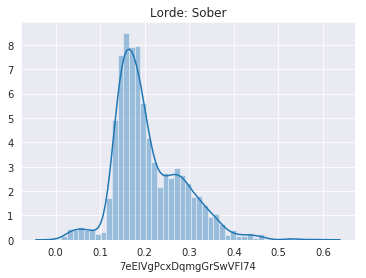

In [9]:
display(df_af_dist.iloc[:,0].describe())
sns.distplot(df_af_dist.iloc[:,0])
plt.title("{}: {}".format(df_af['artist_names'].loc[df_af['id']==df_af_dist.columns.values[0]].iloc[0],
                          df_af['track_names'].loc[df_af['id']==df_af_dist.columns.values[0]].iloc[0]))
plt.show();

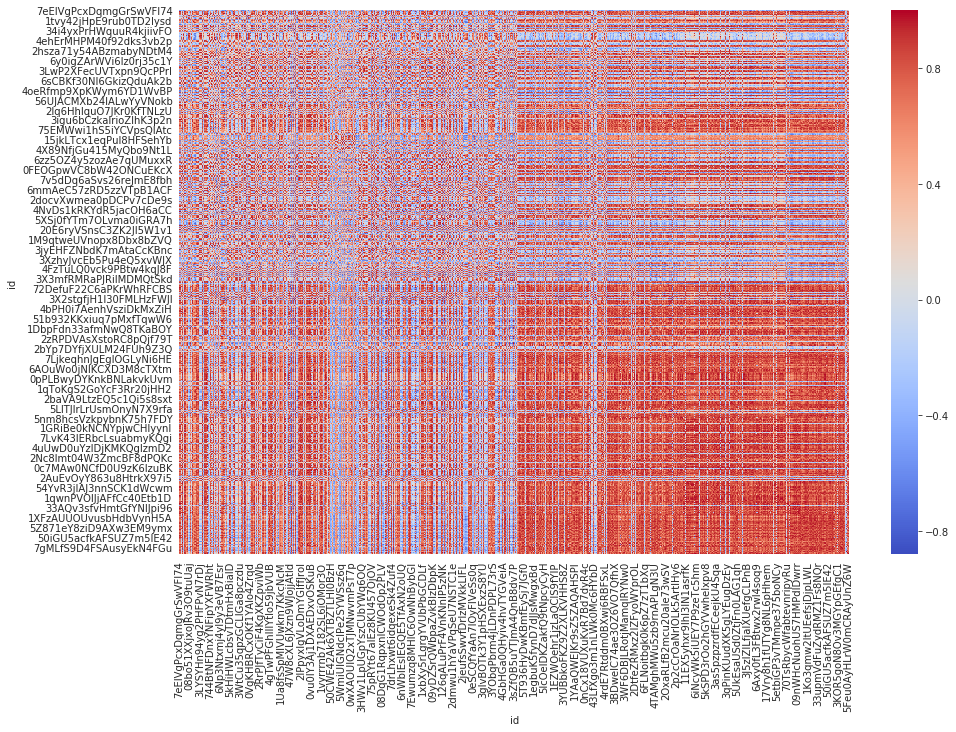

In [0]:
plt.figure(figsize=(15,10))
sns.heatmap(df_af_dist.corr(), cmap='coolwarm')

In [10]:
track_id = df_af_dist.iloc[:,0].name
print("{}: {}\n".format(df_af["artist_names"].loc[df_af['id']==track_id].values,
                      df_af["track_names"].loc[df_af['id']==track_id].values))

similar_songs = df_af_dist[track_id].sort_values().head().index
print("target: artist: track")
for id in similar_songs:
  print("{}: {}: {}".format(df_af["target"].loc[df_af['id']==id].values,
                            df_af["artist_names"].loc[df_af['id']==id].values,
                            df_af["track_names"].loc[df_af['id']==id].values))

['Lorde']: ['Sober']

target: artist: track
[1]: ['Lorde']: ['Sober']
[1]: ['G-Eazy']: ['Shake It Up']
[1]: ['Jeremy Zucker']: ['Peace Signs']
[1]: ['KYLE']: ['iSpy (feat. Kodak Black)']
[1]: ['Skizzy Mars']: ['Girl on a Train']


## Embeddings Similarity

### Cosine Similarity

In [46]:
df_emb.head()

,id,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,7eElVgPcxDqmgGrSwVFI74,-1.176089,-0.107737,-0.569370,-0.250905,-0.196079,0.233768,0.643306,1.164762,-0.953797,0.885341,0.233456,1.157343,-1.184159,2.234673,1.082309,1.509842,1.017656,0.275086,0.189763,0.016859,-0.937232,0.386363,-0.124789,-0.556945,-0.054143,-0.929406,-0.012605,0.002390,0.076078,1.339858,-0.044450,0.330110,0.442595,0.388205,-0.376086,0.700518,0.621598,0.748061,-0.216787,...,-0.798792,0.545758,-1.742035,1.100794,-0.220692,0.231865,-1.909952,0.287531,1.090605,-0.316892,-0.428898,-1.394379,0.174889,0.161786,0.455423,-0.789939,0.718991,0.441111,-3.599369,0.491262,2.301007,-0.248004,-0.391195,-1.016250,3.749099,-1.811283,-0.371740,0.443924,1.509911,0.873805,1.110983,0.665313,-0.374531,1.115654,1.214633,-1.089690,0.626421,0.225999,1.874248,0.061833
1,02oAUzv4M0ItuTDy2RT3IT,-0.818456,-0.335162,-0.709084,-0.453882,-0.044109,-0.442736,0.629614,1.860680,-0.421865,1.260538,0.633872,1.731610,-0.870405,1.403824,2.325687,1.376182,0.929350,1.006097,0.436990,-0.342039,-0.436087,0.256072,0.461765,-1.524332,-0.195616,-0.076263,-0.307228,-0.743518,-0.357217,0.622497,0.169596,0.113535,1.616498,0.245950,0.090101,1.020024,0.232876,0.335385,-0.841537,...,0.285158,-0.263945,0.749996,0.654952,-0.238688,-0.054873,-1.097025,0.391275,0.748996,-0.616449,-0.261274,-0.062964,-0.156516,0.493264,-0.154108,-1.271534,-0.117976,0.833755,-2.488465,0.329558,1.326031,0.313144,0.049839,-1.980360,2.495708,-1.027027,-0.406434,0.175048,1.367751,-0.353575,-0.577227,0.156613,-0.466348,0.963598,0.362988,-1.543788,1.052845,-0.416015,1.296092,0.121682
2,5q4BpnMrYEFzLO0dYODj6J,-0.878218,0.282790,-0.808863,-0.433924,0.407604,-0.123266,1.535059,2.379490,-0.050003,1.327469,0.951804,1.565531,-2.178823,2.941031,2.310419,0.691588,0.846726,0.990229,-0.498455,-0.957336,-0.606049,0.509263,-0.357404,-0.061091,-0.657854,0.445772,0.291457,-0.649670,-0.397943,0.907033,0.644040,1.077925,0.929998,-0.379858,-0.019066,1.889962,-0.469290,0.961969,-0.685247,...,0.242475,0.261855,-1.700499,1.223980,0.194463,0.149520,-1.180804,0.501860,1.182535,-0.521616,0.022584,-0.413291,-0.211203,-0.180345,0.320369,0.002017,0.229807,1.572091,-3.182798,0.267235,1.822537,-0.073181,-0.531030,-1.385447,3.121033,-1.586558,-1.017582,0.794861,2.035471,1.305898,-0.218693,0.765706,0.129413,0.004000,1.214114,-0.778976,0.771592,0.742636,1.440566,0.341989
3,6Kkt27YmFyIFrcX3QXFi2o,-0.466507,0.792432,-0.494447,-0.100590,0.546727,-0.253614,0.794765,2.198832,-0.234965,0.627541,0.867905,1.829224,-1.905063,2.337999,1.501105,0.749387,1.298659,0.994754,-0.205810,-0.534288,-0.753254,0.670505,0.460462,-0.790256,-0.331815,0.215781,-0.252302,-1.027334,-0.459904,1.226175,0.722869,0.377776,0.561733,-0.383966,1.132673,1.598741,-0.868457,0.226428,-0.208647,...,-0.333039,-0.237912,-0.983652,1.242136,0.472568,-0.082934,-1.539467,-0.382526,1.190959,-0.089749,-0.371374,-0.707636,-0.157277,-0.374877,0.577229,-0.268020,-0.225148,0.318669,-2.760939,0.618850,1.227416,0.366311,-0.322368,-1.513218,2.884911,-1.859549,-0.601079,0.124937,1.923958,0.742204,0.565165,0.367270,0.400754,0.731161,0.027032,-1.258719,0.053601,0.620349,1.534137,0.729435
4,1Dp7JGFNjvg8Nk0CtMCcnr,-0.821989,1.116456,-0.099389,0.346411,0.864321,-0.394252,0.421176,1.416335,-0.827872,1.231101,0.509105,1.946500,-1.710877,1.770404,1.396535,1.170612,0.788084,1.045131,-0.393810,-0.345053,-0.226228,1.440690,0.052912,-0.692761,-0.927573,-0.514701,-0.332411,-1.399359,-0.215262,1.182957,0.182795,0.323677,0.178181,0.203908,0.652043,1.405541,-0.505214,-0.201571,-0.538093,...,0.261286,0.062619,-0.791093,1.272661,0.106606,0.545044,-0.981968,-0.429405,0.693736,0.359888,-0.533965,-1.278841,0.436552,-0.361887,0.937292,-0.128248,0.578932,1.355664,-1.887670,-0.182790,1.033373,0.134563,

In [47]:
#from scipy import spatial
print(spatial.distance.cosine(df_emb.drop('id', axis=1).iloc[0, :], df_emb.drop('id', axis=1).iloc[1, :]))
print(spatial.distance.cosine(df_emb.drop('id', axis=1).iloc[0, :], df_emb.drop('id', axis=1).iloc[2, :]))

0.209045981991544
0.16310035543487733


In [52]:
labels = df_emb['id']
df_emb_noid = df_emb.drop('id', axis=1)

# Compute the similarity matrix between the embeddings vectors.
dist = spatial.distance.cdist(df_emb_noid,
                              df_emb_noid,
                              metric='cosine') 
df_emb_dist = pd.DataFrame(data=dist, columns=labels, index=labels)

print(df_emb_dist.shape)
display(df_emb_dist.head())

(3502, 3502)


id,7eElVgPcxDqmgGrSwVFI74,02oAUzv4M0ItuTDy2RT3IT,5q4BpnMrYEFzLO0dYODj6J,6Kkt27YmFyIFrcX3QXFi2o,1Dp7JGFNjvg8Nk0CtMCcnr,54ucfuN596MU25jQD3KjCL,193Dm5SqYy3hTSbuzxbwKc,6K8VQ84MqhsoakN5MjrnVR,6lFDB0BFDRV58qaQDX85jV,7ARveOiD31w2Nq0n5FsSf8,4fxNwAXn8J9LNi5Rz8eMIv,0cQ5y2ycYOR7KrMG752t8Q,1ZQwftFvuyrHrl41HA9dOC,48jKLs2qqEXKsQTmYHE0JD,2XELtFPg5H2Xmg6eas6dII,2ScrwCtee5LnTrpQZfrxqJ,0j1BAvgZnO5LoRCsGtgYYG,7GLvGlqdg2ocugG4G5ih4I,0cqiehfcVFq3ISC3pO9zLE,7w45f9uLSXE56Bezwjdl8B,53LWnHbfoBuARHoAtEwrBY,3cUQUcDvzrbfSFXHpLvdXf,3fOCHVP6W1uXr2kkZ1dzm0,720VccfW5GV9ZM4OKAAGUg,3t3oNm7M0HXf7ILqA7vCTP,20OrSCxQNhfAtiWtbLn3hf,6mmAeC57zRD5zzVTpB1ACF,3k08Cja0lw4MKJ72AyCGzU,4B6BiC4TZUbvXMbrdx2rhq,0bPSRn4crnh5f1JhELPlyL,7jStM0aMv8WoG91YrrDMbw,5SD3nF4GLH4UTtt0OGWatS,0gb1J5UrTpzaU1s3nupgCd,2MHCiOohBZEQuLgDTPvSzF,46lFttIf5hnUZMGvjK0Wxo,1uf5f99kLdlmUBEvVqrFyy,7kJlTKjNZVT26iwiDUVhRm,401Xo6kdmYwDZ5l0RDsjC4,0LkelFnnzJPC8dtZSZ9Og8,2mSrVZsSKn2Ye5f0YuAbMh,...,5EDt7cxNUAVK0QlGjPo1dZ,2XDFo773cf5SiQDPRKVrn4,6dGWq08LXuIw6T2oUeHECh,4cts2JWIBKsSyMuclg7yZP,4dim8F8t01qimHOmr6S3Gd,5NBbYPv6iAyrHFnSI1VSBa,6LRxf2d6Bztnn01smiwvxV,4CTRaPVgo1FBmDTcGlmwlp,18FrJXel361ubAHzCmK4Oh,6nYRlWG0Q3wnDTSGTsRGvJ,56AY1iF8R2nKzkyd9WqO5s,5j2yIrnbgDW51GM95ZjqDj,5gTSRrZ3U0n6prTlle2yD1,0cunAi5FhuVTMMIE9XfqfP,6UtB0ezZwMneQIfLJ1Yzc1,5Yi6mwvMHnnh241uGjcJYy,77cAX9YNjWeMVnIbxqmXCQ,1vuVRE6oXisoKFDqqs7CAD,1AxQ1GwibfZSL9iEDELkBY,13zXC9OQZByn4c75acjqcT,4oeQbo7JrGgUQEdstGXEWh,0PfPYe5VGsJTYkREkp8t5G,2A9ERxDfT3sdShrDUtTnaS,6Ra5YZBdQRVRHX1GhRA4hH,77mMRnFjJMuHAtXcJGjggl,4AueunxhnlBUvdLRfW03Nq,15KMF1tGXYUFs3Jvwnp45m,1ROpf85HZ15kXYHad4ZptK,3fqwjXwUGN6vbzIwvyFMhx,0qzjNRjr6znNsTGeLhKE9h,4OHh00l3XsQSibMHo169g0,4UBbI9mOVefKlFcMt9GQSq,76lgcpdPtw5hHu3A6LuGZe,5C6uh95eAL0RBTSGXKQwvk,6p5GuyEqQH5pv02ouEyogQ,3I7krC8kr0gFR7P6vInR1I,5Feu0AyHLrW0mCRAyUnZ6W,6caDnpIOivsjLRXqlJJxCD,10M2Ex445zw585Ducldzkw,66pxmg3Jhjm09tHoWR1wVR
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7eElVgPcxDqmgGrSwVFI74,2.220446e-16,0.209046,1.631004e-01,0.172848,0.227003,0.190718,0.197278,0.200244,0.262381,0.479395,0.239009,0.207264,0.272530,0.445243,0.259907,0.254001,0.484372,0.205664,0.188793,0.195302,0.216984,0.209604,0.227723,0.258366,0.489269,0.291744,0.437158,0.464514,0.246907,0.205205,0.270144,0.462813,0.250500,0.225165,0.225222,0.216851,0.194231,0.182007,0.201356,0.200978,...,0.779768,0.781027,0.782297,0.783474,0.784337,0.784974,0.785314,0.785362,0.785154,0.784615,0.783645,0.782633,0.782028,0.781920,0.782083,0.782454,0.782828,0.782893,0.782686,0.782051,0.781140,0.780115,0.779044,0.777976,0.776802,0.775440,0.773886,0.772061,0.769934,0.767260,0.764179,0.761495,0.759346,0.758467,0.759880,0.760446,0.765176,0.772505,0.798240,0.810309
02oAUzv4M0ItuTDy2RT3IT,2.090460e-01,0.000000,2.147844e-01,0.218002,0.234047,0.241604,0.311516,0.308044,0.299157,0.537719,0.338557,0.288565,0.284981,0.492669,0.299413,0.305066,0.540600,0.257081,0.243899,0.237109,0.271041,0.251731,0.239889,0.312187,0.535875,0.301570,0.473370,0.506402,0.256393,0.313694,0.323948,0.509926,0.306259,0.276673,0.257832,0.264852,0.285089,0.264626,0.223111,0.265495,...,0.791969,0.793223,0.794563,0.795914,0.797038,0.798009,0.798873,0.799882,0.801075,0.802118,0.802826,0.803459,0.804159,0.805079,0.806184,0.807394,0.808625,0.809638,0.810360,0.810713,0.810774,0.810524,0.810034,0.809596,0.809041,0.808246,0.807140,0.805588,0.803576,0.800878,0.797686,0.794764,0.792502,0.791754,0.793270,0.795838,0.800230,0.804323,0.818288,0.849838
5q4BpnMrYEFzLO0dYODj6J,1.631004e-01,0.214784,2.220446e-16,0.103300,0.177369,0.110317,0.130046,0.134982,0.236944,0.479910,0.203131,0.169765,0.211419,0.436459,0.221020,0.195546,0.467998,0.183151,0.154735,0.150214,0.177579,0.177069,0.178816,0.188236,0.472871,0.205003,0.409875,0.446293,0.188540,0.170808,0.219617,0.446335,0.215231,0.190127,0.187762,0.158987,0.147979,0.138200,0.173882,0.176870,...,0.779193,0.780331,0.781539,0.782634,0.783404,0.784073,0.784684,0.785356,0.786018,0.786463,0.786395,0.785990,0.785656,0.785576,0.785540,0.785287,0.784687,0.783629,0.

In [53]:
#from google.colab import files
filename = "embeddings_dist"
df_emb_dist.to_csv(filename+".csv")
#files.download(filename+".csv")

----------------------------------------
Exception happened during processing of request from ('::ffff:127.0.0.1', 39732, 0, 0)
Traceback (most recent call last):
  File "/usr/lib/python3.6/socketserver.py", line 320, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/usr/lib/python3.6/socketserver.py", line 351, in process_request
    self.finish_request(request, client_address)
  File "/usr/lib/python3.6/socketserver.py", line 364, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/usr/lib/python3.6/socketserver.py", line 724, in __init__
    self.handle()
  File "/usr/lib/python3.6/http/server.py", line 418, in handle
    self.handle_one_request()
  File "/usr/lib/python3.6/http/server.py", line 406, in handle_one_request
    method()
  File "/usr/lib/python3.6/http/server.py", line 639, in do_GET
    self.copyfile(f, self.wfile)
  File "/usr/lib/python3.6/http/server.py", line 800, in copyfile
    shutil.copyfil

### Computing Similarity

count    3.502000e+03
mean     5.016598e-01
std      2.091624e-01
min      2.220446e-16
25%      3.017037e-01
50%      5.039587e-01
75%      7.382905e-01
max      8.491832e-01
Name: 7eElVgPcxDqmgGrSwVFI74, dtype: float64

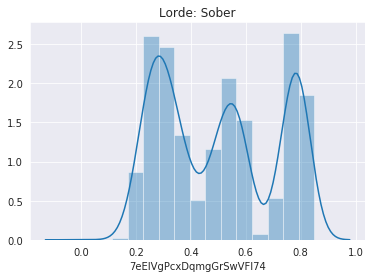

In [54]:
display(df_emb_dist.iloc[:,0].describe())
sns.distplot(df_emb_dist.iloc[:,0])
plt.title("{}: {}".format(df_af['artist_names'].loc[df_af['id']==df_emb_dist.columns.values[0]].iloc[0],
                          df_af['track_names'].loc[df_af['id']==df_emb_dist.columns.values[0]].iloc[0]))
plt.show();

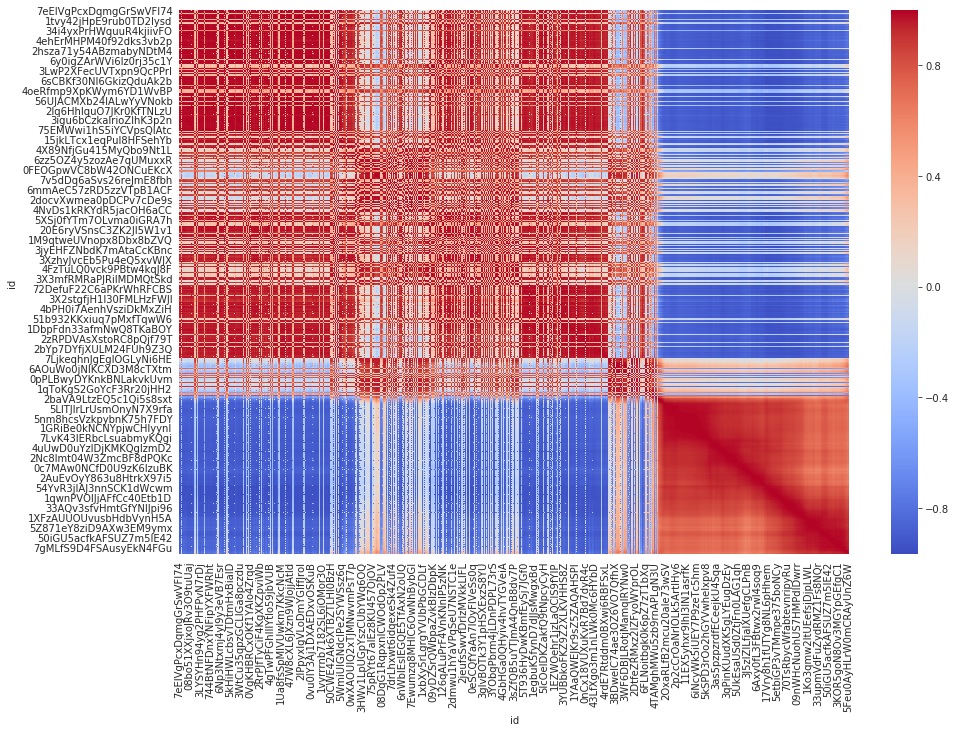

In [0]:
plt.figure(figsize=(15,10))
sns.heatmap(df_emb_dist.corr(), cmap='coolwarm')

In [0]:
track_id = df_emb_dist.iloc[:,0].name
print("{}: {}\n".format(df_af["artist_names"].loc[df_af['id']==track_id].values,
                      df_af["track_names"].loc[df_af['id']==track_id].values))

similar_songs = df_emb_dist[track_id].sort_values().head().index
print("target: artist: track")
for id in similar_songs:
  print("{}: {}: {}".format(df_af["target"].loc[df_af['id']==id].values,
                            df_af["artist_names"].loc[df_af['id']==id].values,
                            df_af["track_names"].loc[df_af['id']==id].values))

['Lorde']: ['Sober']

target: artist: track
[1]: ['Lorde']: ['Sober']
[1]: ['Lorde']: ['Sober']
[1]: ['Oh Wonder']: ['Midnight Moon']
[1]: ['Lorde']: ['The Louvre']
[1]: ['CHVRCHES']: ['Tether']
